In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

In [2]:
data=pd.read_csv("/Users/ped/Downloads/archive/Amazon Sale Report.csv")

/var/folders/gb/1hpzb2cs5zv7rm95tkw7jfj00000gp/T/ipykernel_5924/1627489464.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv("/Users/ped/Downloads/archive/Amazon Sale Report.csv")


In [3]:
data.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [4]:
data.shape

(128975, 24)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [6]:
data.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [7]:
data.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,128975
Order ID,120378
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1377
SKU,7195
Category,9


In [8]:
data.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


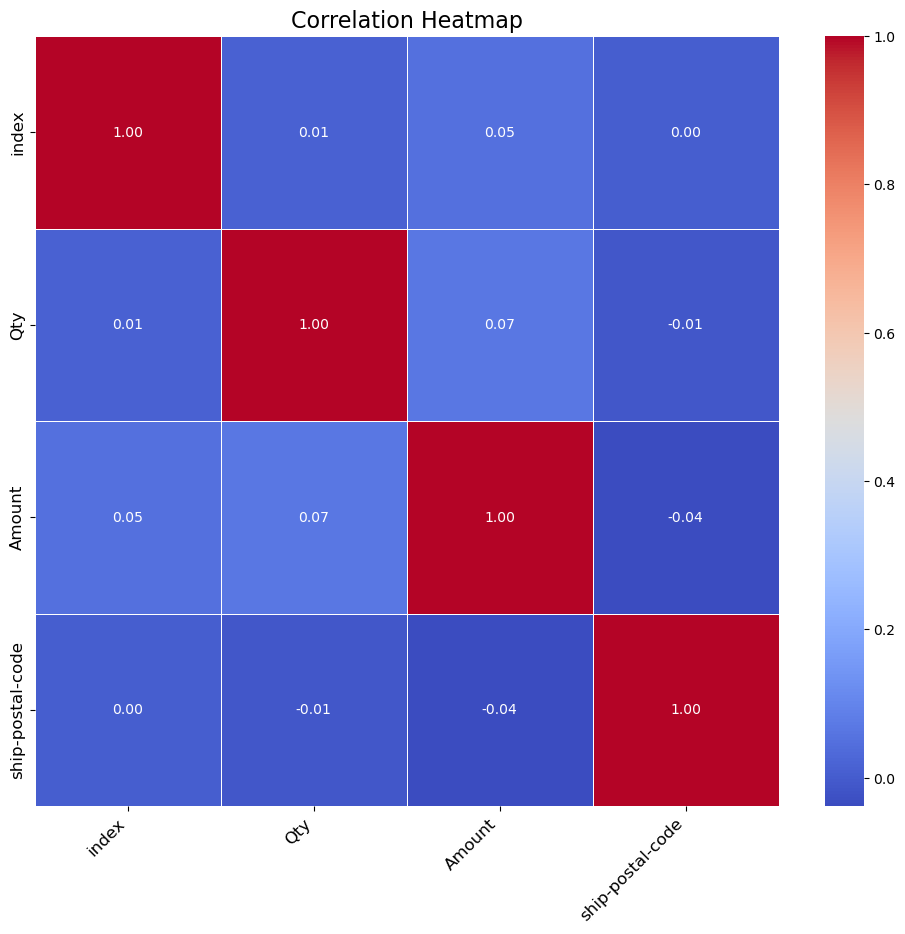

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [10]:
data.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [11]:
data.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel ', 'promotion-ids', 'ship-postal-code','ship-state', 'ship-city', 'Courier Status' ], inplace = True)

In [12]:
data.isnull().sum()

Order ID                 0
Date                     0
Status                   0
Fulfilment               0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
ASIN                     0
Qty                      0
Amount                7795
B2B                      0
dtype: int64

In [13]:
data['Amount'].fillna(0, inplace = True)

In [14]:
data.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
Amount                0
B2B                   0
dtype: int64

In [15]:
data.duplicated().sum()

6

In [16]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

In [17]:
# Convert INR to USD using an exchange rate of 1 INR = 0.014 USD
exchange_rate = 0.0120988
data['Amount '] = data['Amount'].apply(lambda x: x * exchange_rate)

In [18]:
data['B2B'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

In [19]:
data.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,B2B,Amount
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,647.62,customer,7.835425
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1,406.00,customer,4.912113
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,329.00,business,3.980505
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,753.33,customer,9.114389
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1,574.00,customer,6.944711


In [20]:
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%y')
data['month'] = data['Date'].dt.month
data['month'].unique()

array([4, 3, 5, 6], dtype=int32)

In [21]:
#changing months to numerical to be use in graph
months = ['march','April', 'May', 'June']
data['month'].replace([3,4,5,6],months, inplace = True)

In [22]:
print(f'The earliest date is {data["Date"].min()}')
print(f'The latest date is {data["Date"].max()}')

The earliest date is 2022-03-31 00:00:00
The latest date is 2022-06-29 00:00:00


In [23]:
data.head()

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,Amount,B2B,Amount,month
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,647.62,customer,7.835425,April
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1,406.00,customer,4.912113,April
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,329.00,business,3.980505,April
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,753.33,customer,9.114389,April
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1,574.00,customer,6.944711,April


In [24]:
# 1. Groupby and Sum of Amount by Category
category_sum = data.groupby('Category')['Amount'].sum().sort_values(ascending=False)

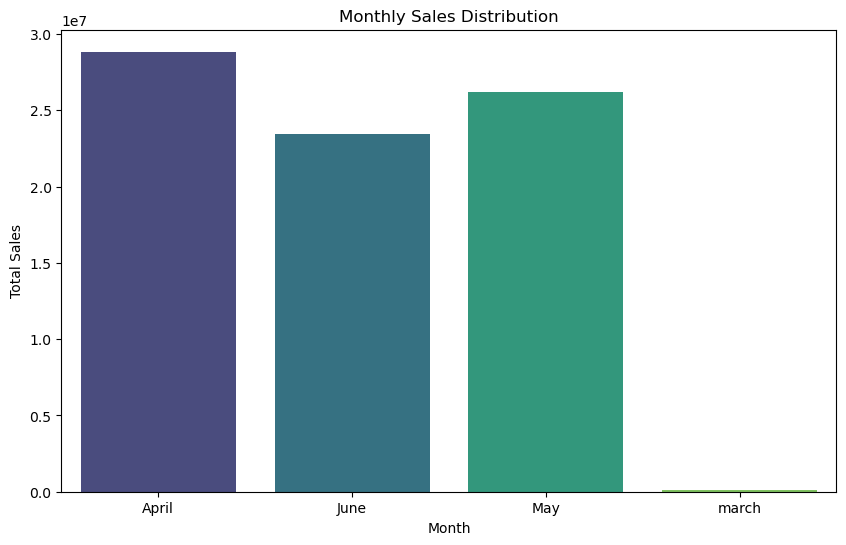

In [25]:
# 2. Monthly Sales Distribution
monthly_sales = data.groupby('month')['Amount'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [26]:

# Assuming your time series data is in the 'Date' and 'Amount' columns
# Make sure your 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data.set_index('Date', inplace=True)

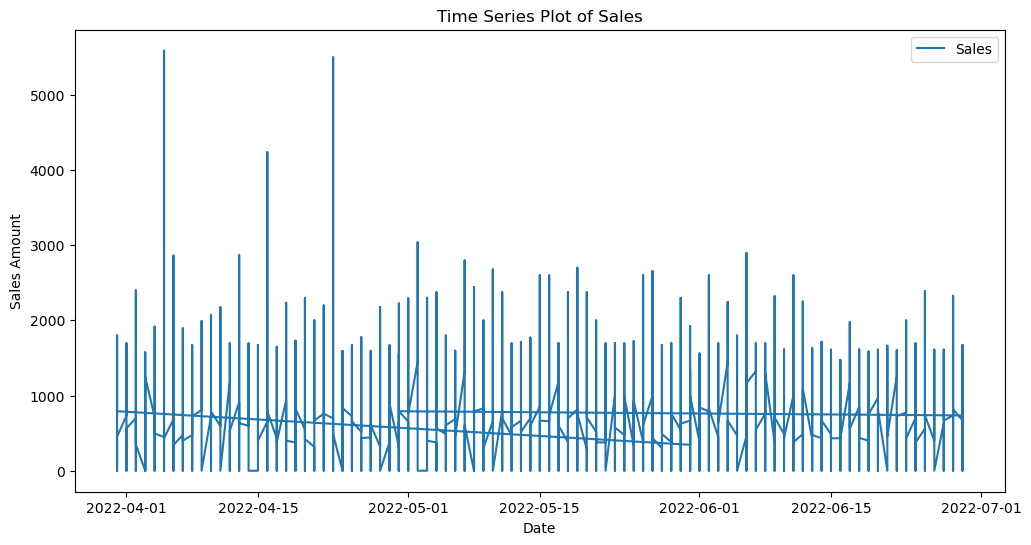

In [27]:
#Trend Analysis:
#Plot the Time Series:

plt.figure(figsize=(12, 6))
plt.plot(data['Amount'], label='Sales')
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

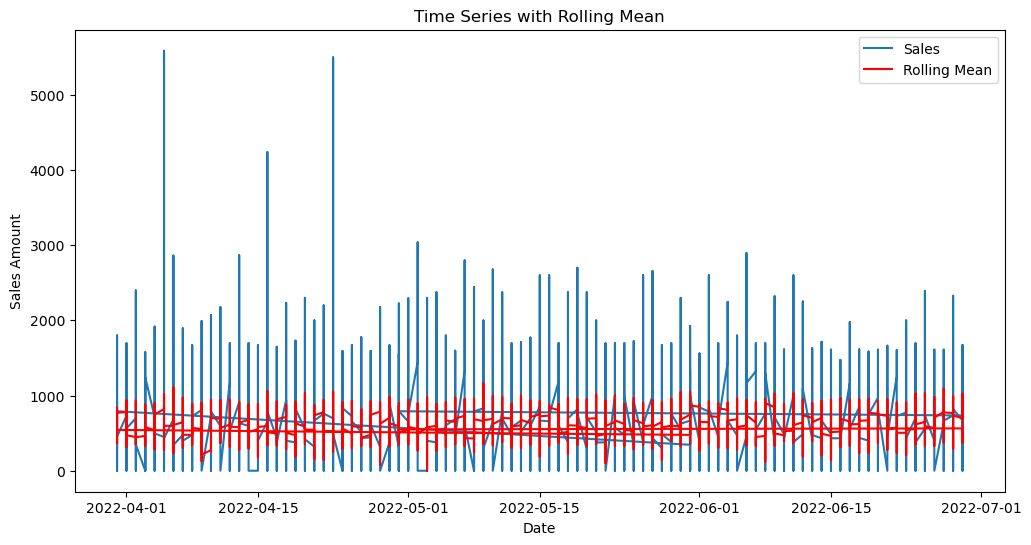

In [27]:
#Rolling Statistics:
#Calculate and plot rolling statistics (e.g., moving averages) to smooth out noise and identify trends more easily.

rolling_mean = data['Amount'].rolling(window=12).mean()
plt.figure(figsize=(12, 6))
plt.plot(data['Amount'], label='Sales')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.title('Time Series with Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

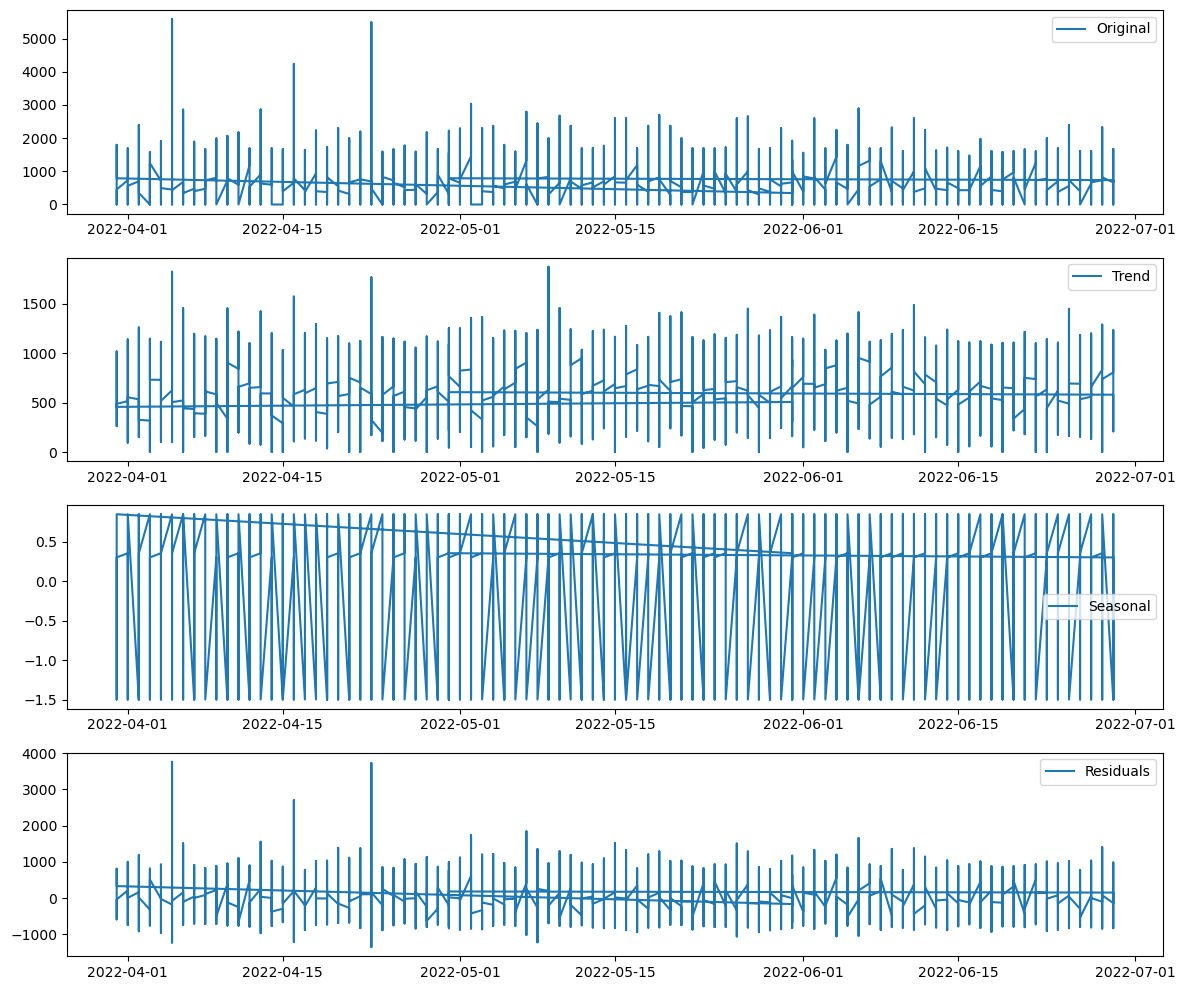

In [29]:
#Decomposition:
#Decompose the time series into trend, seasonality, and residual components.

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Amount'], period=4) #4months
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 10))

plt.subplot(411)
plt.plot(data['Amount'], label='Original')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# <center>Time Series Modeling</center>

#Seasonality Analysis:
#Autocorrelation Function (ACF):


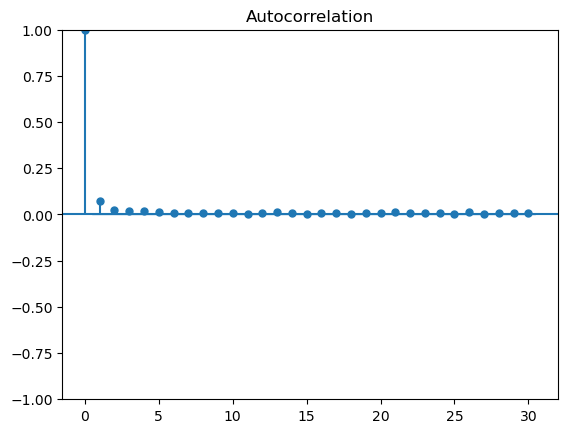

In [31]:
#Plot the ACF to identify the seasonality pattern.

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data['Amount'], lags=30)
plt.show()

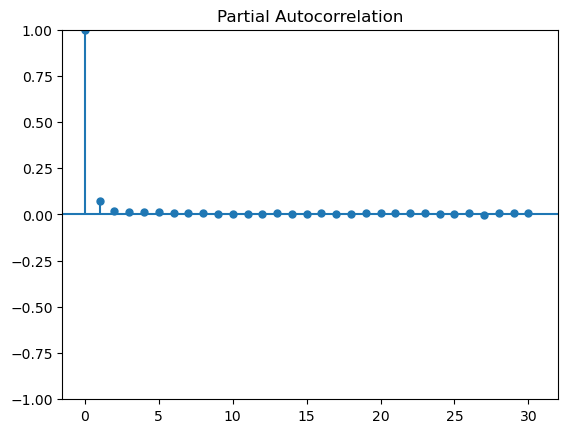

In [32]:
#Autocorrelation Analysis:
#Partial Autocorrelation Function (PACF):
#Plot the PACF to identify significant lags in the autocorrelation.

from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data['Amount'], lags=30)
plt.show()


In [ ]:
# Check for missing data
#print(df.isnull().sum())
#After finding no missing data, we performed the Augment Dickey-Fuller (ADF) test to check for stationarity.

In [ ]:
#Augmented Dickey-Fuller Test:
#Conduct the Augmented Dickey-Fuller test to check for stationarity in the time series.
# Define Augmented Dickey-Fuller (ADF) test function as per statsmodels
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

# Apply the ADF test to your time series data
adf_test(data['Amount'])


Results of Dickey-Fuller Test:
